In [ ]:
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Save to CSV
data = np.hstack((X, y))
df = pd.DataFrame(data, columns=['X', 'y'])
df.to_csv('dataset.csv', index=False)

Theta0: 4.215096149541957
Theta1: 2.7701133935062785


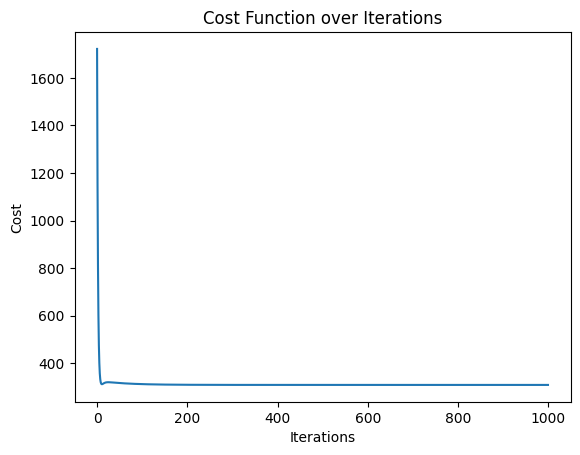

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('dataset.csv')
X = data['X'].values
y = data['y'].values

# Add a column of ones to X to account for the intercept term
X_b = np.c_[np.ones((len(X), 1)), X]

# Initialize parameters
theta = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.1
n_iterations = 1000

# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for iteration in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y.reshape(-1, 1)  # Reshape y to match predictions
        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost_history[iteration] = compute_cost(X, y, theta)

    return theta, cost_history

# Run gradient descent
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, n_iterations)

# Print the final theta values
print("Theta0:", theta[0][0])
print("Theta1:", theta[1][0])

# Plot the cost history
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()